In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Dataset path
dataset_path = r"C:\Users\Shridevi Bharne\Desktop\UCI HAR Dataset"

# Reading files with raw strings or escaped backslashes
activity_labels = pd.read_csv(f"{dataset_path}/activity_labels.txt", header=None, sep=r'\s+', names=["ActivityID", "Activity"])
features = pd.read_csv(f"{dataset_path}/features.txt", header=None, sep=r'\s+', names=["Index", "Feature"])

X = pd.read_csv(f"{dataset_path}/train/X_train.txt", sep=r'\s+', header=None)
y = pd.read_csv(f"{dataset_path}/train/y_train.txt", sep=r'\s+', header=None, names=["ActivityID"])
subjects = pd.read_csv(f"{dataset_path}/train/subject_train.txt", sep=r'\s+', header=None, names=["SubjectID"])

In [26]:
# Assign feature names to X
X.columns = features["Feature"]

In [27]:
# Merge activity labels with y
y = y.merge(activity_labels, on="ActivityID", how="left")
y = y["Activity"]  # Extract only the activity names

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split the dataset (if not using provided train-validation split)
X_train, X_Val, y_train, y_Val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_Val)

Model Accuracy: 98.44%

 Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.97      0.96       262
          STANDING       0.97      0.96      0.97       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.98      0.98      0.98      1471



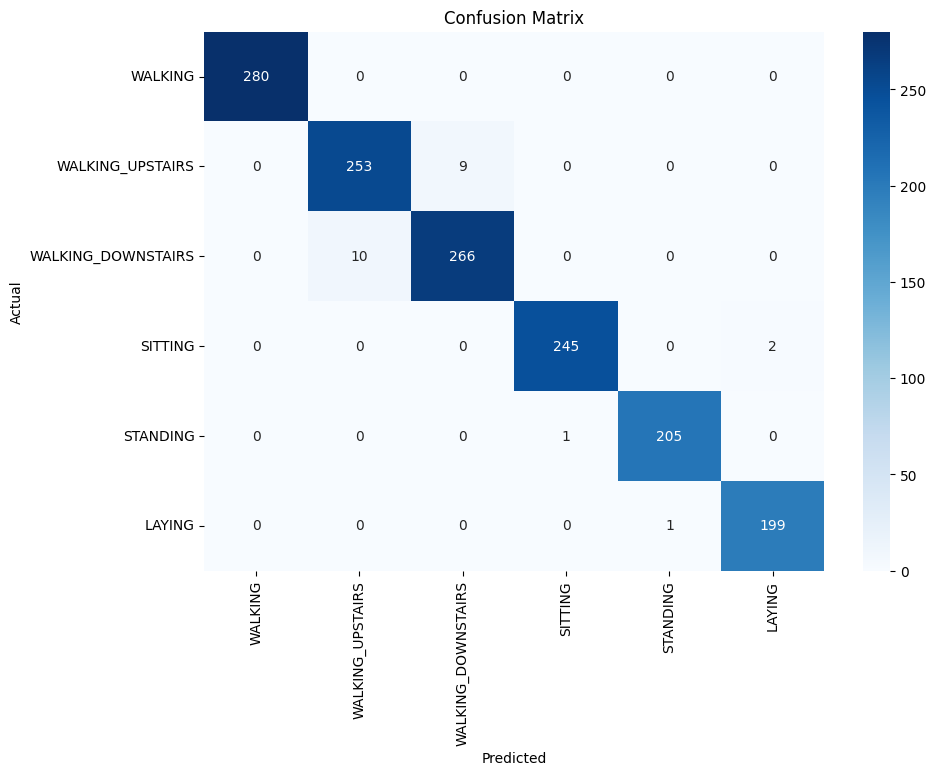

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_Val, y_val_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_Val, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_Val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels["Activity"], yticklabels=activity_labels["Activity"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
#testing the above trained model using X_test,y_test,subject_test dataset

# Dataset path
dataset_path = r"C:\Users\Shridevi Bharne\Desktop\UCI HAR Dataset"

# Load test datasets
X_test_raw = pd.read_csv(f"{dataset_path}/test/X_test.txt", sep=r'\s+', header=None)
y_test_raw = pd.read_csv(f"{dataset_path}/test/y_test.txt", sep=r'\s+', header=None, names=["ActivityID"])
subject_test_raw = pd.read_csv(f"{dataset_path}/test/subject_test.txt", sep=r'\s+', header=None, names=["SubjectID"])

# Load activity labels for mapping
activity_labels = pd.read_csv(f"{dataset_path}/activity_labels.txt", header=None, sep=r'\s+', names=["ActivityID", "Activity"])

# Ensure datasets are loaded
print(f"X_test shape: {X_test_raw.shape}")
print(f"y_test shape: {y_test_raw.shape}")
print(f"Subject_test shape: {subject_test_raw.shape}")

#scaler.transform(X)
X_test_scaled = scaler.fit_transform(X_test_raw)

y_pred = model.predict(X_test_scaled)

# Merge y_test with activity labels
if not y_test_raw.empty:
    y_test = y_test_raw.merge(activity_labels, on="ActivityID", how="left")["Activity"]
    print(f"y_test after merging: {y_test.head().values}")
else:
    print("y_test_raw is empty. Please check the dataset loading process.")
# Verify consistency of lengths
print(f"y_test length: {len(y_test)}")
print(f"Predicted activities length: {len(y_pred)}")

X_test shape: (2947, 561)
y_test shape: (2947, 1)
Subject_test shape: (2947, 1)
y_test after merging: ['STANDING' 'STANDING' 'STANDING' 'STANDING' 'STANDING']
y_test length: 2947
Predicted activities length: 2947


In [33]:
y_test_raw

,ActivityID
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


Model Accuracy: 96.17%

 Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.91      0.93       491
          STANDING       0.92      0.96      0.94       532
           WALKING       0.97      0.97      0.97       496
WALKING_DOWNSTAIRS       0.97      0.96      0.96       420
  WALKING_UPSTAIRS       0.95      0.97      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



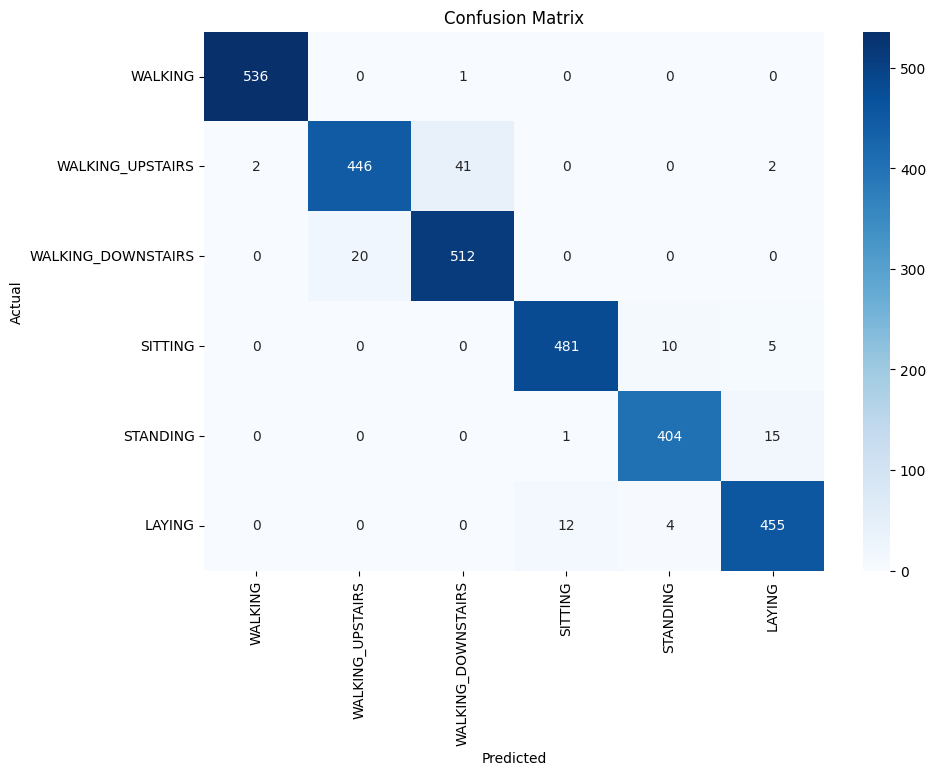

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels["Activity"], yticklabels=activity_labels["Activity"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()